In [27]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
train = pd.read_csv('D_train.csv')
test = pd.read_csv('D_test.csv')
submission = pd.read_csv('D_sample_submission.csv')

In [29]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [30]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [31]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [32]:
print(' train shape: ', train.shape, '\n', 'test shape: ', test.shape)

 train shape:  (1205, 12) 
 test shape:  (50, 10)


In [33]:
# 편의상 칼럼을 수정해주겠습니다. 
train = train.copy()
train.columns = ['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'brk', 'ln', 'dn', 'target_ln', 'target_dn']
train.head(2)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn,target_ln,target_dn
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [34]:
test = test.copy()
test.columns = ['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'brk', 'ln', 'dn']
test.head(2)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


**편의상 날짜를 datetime형식으로 바꿔주고 동시에 요일 정보를 숫자로 바꾸겠습니다.**

In [35]:
def to_datetime(df, date):
    df['date'] = pd.to_datetime(df[date])
    df['dow'] = pd.to_datetime(df[date]).dt.weekday + 1
to_datetime(train, 'date'); to_datetime(test, 'date')

In [36]:
train.head(5)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn,target_ln,target_dn
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [37]:
test.head(5)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn
0,2021-01-27,3,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,4,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,5,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,1,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,2,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [38]:
lunch = []
for day in range(len(train)):
    tmp = train.iloc[day, 8].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제

    search = '('   # 원산지 정보는 삭제
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    lunch.append(tmp) 

In [39]:
lunch[0:5]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치']]

In [40]:
lunch[1065:1070]

[['쌀밥/잡곡밥', '매운소고기국', '굴비구이', '토마토프리타타', '도라지오이무침', '배추겉절이'],
 ['돈육버섯고추장덮밥', '팽이무국', '양파링카레튀김', '모듬어묵볶음', '참나물생채', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉모밀국수', '매운돈갈비찜', '메밀전병*간장', '고구마순볶음', '포기김치', '양상추샐러드*딸기요거트'],
 ['쌀밥/잡곡밥', '대파육개장', '홍어미나리초무침', '어묵잡채', '콩자반', '배추겉절이', '양상추샐러드*오리엔탈'],
 ['카레라이스', '동태알탕', '부추고추전*간장', '쫄면야채무침', '과일요거트샐러드', '포기김치', '요구르트']]

**처음에는 밥/국/반찬3개/사이드(요구르트 등)/김치 순서로 기록되어 있다가, 2020-07-01부터 갑자기 사이드(샐러드 등)와 김치의 순서가 뒤바뀝니다.<br>
+행으로 따지면 1067번 행부터!**

In [41]:
np.array(train[ (train.index > 1064) & (train.index < 1069)][['date', 'ln']])

array([[Timestamp('2020-06-11 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 매운소고기국  굴비구이  토마토프리타타  도라지오이무침  배추겉절이 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-12 00:00:00'),
        '돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국  양파링카레튀김  모듬어묵볶음  참나물생채 요구르트 포기김치 (김치:국내산) '],
       [Timestamp('2020-07-01 00:00:00'),
        '쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드*딸기요거트 '],
       [Timestamp('2020-07-02 00:00:00'),
        '쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈 ']],
      dtype=object)

**말씀드린 것처럼 위에서 2020-07-01부터 순서가 바뀌는 것을 확인할 수 있었는데<br>
또 새롭게 안 사실은 20/06/13 ~ 20/06/30 까지는 데이터가 아예 없는 것을 확인할 수 있었습니다.**

**지금처럼 그대로 출력하면 그 날의 메뉴가 뭐가 나왔는지 한 눈에 보기는 어렵습니다.<br>
그래서 밥이면 밥, 국이면 국 이렇게 따로 메뉴명별 칼럼을 나누려고 합니다.**

In [42]:
bob = []; gook = []; banchan1 = []; banchan2 = []; banchan3 = []; kimchi = []; side = []
for i, day_menu in enumerate(lunch):
    bob_tmp = day_menu[0]; bob.append(bob_tmp)
    gook_tmp = day_menu[1]; gook.append(gook_tmp)
    banchan1_tmp = day_menu[2]; banchan1.append(banchan1_tmp)
    banchan2_tmp = day_menu[3]; banchan2.append(banchan2_tmp)
    banchan3_tmp = day_menu[4]; banchan3.append(banchan3_tmp)

    if i < 1067:
        kimchi_tmp = day_menu[-1]; kimchi.append(kimchi_tmp)
        side_tmp = day_menu[-2]; side.append(side_tmp)
    else: 
        kimchi_tmp = day_menu[-2]; kimchi.append(kimchi_tmp)
        side_tmp  = day_menu[-1]; side.append(side_tmp)


In [43]:
train_ln = train[['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'ln', 'target_ln']]
train_ln['bob'] = bob
train_ln['gook'] = gook
train_ln['banchan1'] = banchan1; train_ln['banchan2'] = banchan2; train_ln['banchan3'] = banchan3
train_ln['kimchi'] = kimchi 
train_ln['side'] = side

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
train_ln.iloc[1065:1070, 7:]

,ln,target_ln,bob,gook,banchan1,banchan2,banchan3,kimchi,side
1065,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 매운소고기국 굴비구이 토마토프리타타 도라...",682.0,쌀밥/잡곡밥,매운소고기국,굴비구이,토마토프리타타,도라지오이무침,배추겉절이,도라지오이무침
1066,"돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국 양파링카레튀김 모듬어묵볶음 참나...",516.0,돈육버섯고추장덮밥,팽이무국,양파링카레튀김,모듬어묵볶음,참나물생채,포기김치,요구르트
1067,쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드...,866.0,쌀밥/잡곡밥,냉모밀국수,매운돈갈비찜,메밀전병*간장,고구마순볶음,포기김치,양상추샐러드*딸기요거트
1068,쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈,675.0,쌀밥/잡곡밥,대파육개장,홍어미나리초무침,어묵잡채,콩자반,배추겉절이,양상추샐러드*오리엔탈
1069,카레라이스 동태알탕 부추고추전*간장 쫄면야채무침 과일요거트샐러드 포기김치 요구르트,607.0,카레라이스,동태알탕,부추고추전*간장,쫄면야채무침,과일요거트샐러드,포기김치,요구르트


**메뉴명별 칼럼을 만들어주니 이제는 어떤 메뉴의 빈도수가 높은지 궁금해졌습니다.**

In [46]:
gook_df = pd.DataFrame(train_ln['gook'].value_counts().reset_index())
gook_df.head(10)

,index,gook
0,맑은국,46
1,콩나물국,44
2,된장찌개,37
3,어묵국,31
4,가쯔오장국,28
5,아욱국,28
6,배추된장국,28
7,근대국,26
8,꽃게탕,25
9,순두부찌개,23


In [47]:
gook_df.tail(10)

,index,gook
262,들깨버섯탕,1
263,토란탕,1
264,돼지김치찌개,1
265,북어채국,1
266,짜글이돼지찌개,1
267,냉족발야채무침,1
268,새우살미역국,1
269,소고기떡국,1
270,느타리버섯국,1
271,건새우무채국,1


In [48]:
gook_df.gook.describe()

count    272.000000
mean       4.430147
std        7.022545
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       46.000000
Name: gook, dtype: float64

**Train dataset에는 1205개의 행이 있었는데 서로 다른 국 메뉴는 272개 입니다.<br>
특이한 점이라고 할 수 있는것은 절반 이상이 단 1번만 나왔다는 사실입니다.**

In [50]:
# 반찬 1~5 
train_ln[f'banchan1'][0:5]

0      쇠불고기
1     가자미튀김
2      치킨핑거
3     주꾸미볶음
4    돈육씨앗강정
Name: banchan1, dtype: object

In [51]:
banchan_list = []
for i in range(3):
    tmp = train_ln[f'banchan{i+1}']
    for j in range(len(train_ln)):
        tmp2 = tmp[j]
        banchan_list.append(tmp2)

In [52]:
banchan_df = pd.DataFrame(pd.DataFrame(banchan_list).value_counts())
banchan_df.columns = ['banchan']
banchan_df.reset_index(inplace = True)
banchan_df.columns = ['index', 'banchan']

In [53]:
banchan_df.head(10)

,index,banchan
0,오이무침,35
1,오징어볶음,32
2,닭갈비,30
3,버섯불고기,29
4,콩나물무침,28
5,계란말이,28
6,훈제오리구이,27
7,돈육굴소스볶음,25
8,계란찜,24
9,숙주나물,24


In [54]:
banchan_df.tail(10)

,index,banchan
1164,봄동달래무침,1
1165,봄동된장무침,1
1166,봄동숙*간장양념,1
1167,봄동전,1
1168,봄동전*양념,1
1169,봉추찜닭,1
1170,부들어묵볶음,1
1171,부추고추장무침,1
1172,부추고추전*간장,1
1173,히레카츠*소스,1


In [55]:
banchan_df.banchan.describe()

count    1174.000000
mean        3.079216
std         4.371070
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        35.000000
Name: banchan, dtype: float64

**서로 다른 국 메뉴는 272개였던 것과 비교하여 서로 다른 반찬의 메뉴는 1174개로 많은 차이가 나는 것을 확인할 수 있습니다.<br>
또한 같은 국이 최대 46번이 나왔지만 같은 반찬은 최대 35번밖에 나오지 않은 것으로 확인이 되어<br>
국보다는 반찬이 훨씬 다양하게 공급이 되는것을 확인할 수 있습니다!**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056

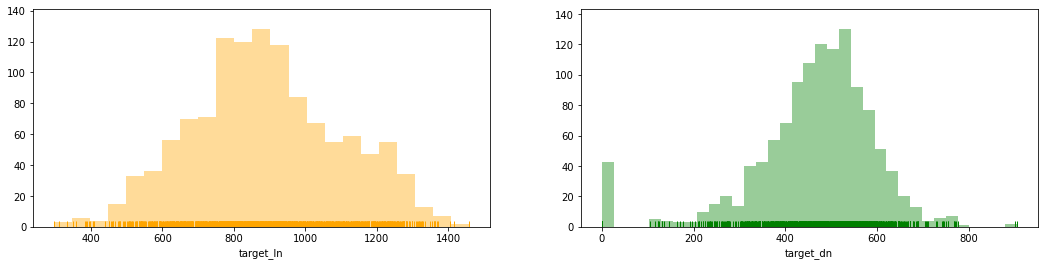

In [56]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(train["target_ln"], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(train["target_dn"], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

**왼쪽이 점심 이용자수, 오른쪽이 저녁 이용자수를 시각화한 것인데요<br>
전반적으로 저녁 이용자수가 상대적으로 적음을 확인할 수 있는데 0명인 날이 존재하는 것이 특이한 것 같습니다.**

**그렇다면 왜 0명인 날이 있는지 한 번 살펴보겠습니다.**

In [57]:
train[train.target_dn == 0][['date',  'dayoff', 'bustrip', 'ovtime', 'remote', 'dow', 'dn', 'target_dn']]

,date,dayoff,bustrip,ovtime,remote,dow,dn,target_dn
204,2016-11-30,68,207,0,0.0,3,*,0.0
224,2016-12-28,166,225,0,0.0,3,*,0.0
244,2017-01-25,79,203,0,0.0,3,*,0.0
262,2017-02-22,75,252,0,0.0,3,*,0.0
281,2017-03-22,53,235,0,0.0,3,*,0.0
306,2017-04-26,45,304,0,0.0,3,*,0.0
327,2017-05-31,43,265,0,0.0,3,자기계발의날,0.0
346,2017-06-28,58,259,0,0.0,3,*자기계발의날*,0.0
366,2017-07-26,254,246,0,0.0,3,가정의날,0.0
392,2017-09-01,177,303,45,0.0,5,*,0.0


**LH에는 특이하게 '자기계발의날'이라고 있는데요. 월에 마지막주 수요일(dow=3)은 모두 정시 퇴근을 해야하는 날이라고 합니다.<br>
그래서 저녁 이용자수가 0명인 것으로 확인이 됩니다.**

**+이상한 점이 있었는데 17/09/27와 18/02/14 양일은 저녁 이용자수가 0명이지만 저녁 메뉴가 제공이 되었습니다.<br>**

In [58]:
tmp = train[['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'target_ln', 'target_dn']]
tmp['month'] = tmp['date'].dt.strftime("%m")

tmp_ln = tmp.groupby(['dow', 'month'])['target_ln'].mean().reset_index().pivot('dow', 'month', 'target_ln')
tmp_dn = tmp.groupby(['dow', 'month'])['target_dn'].mean().reset_index().pivot('dow', 'month', 'target_dn')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


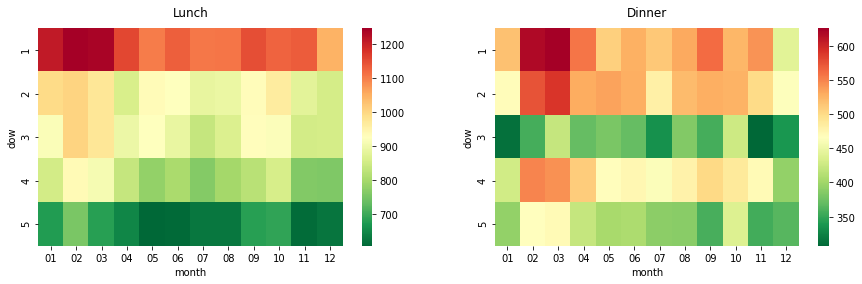

In [59]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))

sns.heatmap(tmp_ln, cmap='RdYlGn_r', ax=ax[0])
ax[0].set_title('Lunch', pad = 12)
sns.heatmap(tmp_dn, cmap='RdYlGn_r', ax=ax[1])
ax[1].set_title('Dinner', pad = 12)

plt.show()

**점심과 저녁 이용자수는 둘 다 월요일에 제일 많은 것으로 나오는데 그 중에서 점심은 1100명이상이나 이용한다는 사실이 나옵니다.<br>
또 점심 이용자수는 금요일에 가장 적은 반면, '자기개발의날' 때문에 저녁 이용자수는 수요일에 가장 적은 것을 알 수 있습니다.<br>**

**특이한 점이 점심과 저녁 이용자수는 2월과 3월에 가장 많은 패턴을 보이는데 왜 그런지는 정확히 모르겠습니다**
